In [1]:
import numpy as np

import pandas as pd

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Conv1D, Flatten, LSTM
from keras.metrics import AUC

from sklearn.metrics import roc_curve, roc_auc_score

from IPython.display import clear_output

# Tratar dados

In [2]:
dadosCNN = pd.read_csv(r"C:\Users\NEPS\Desktop\Murilo Thomes\finalIA\resultadosCNN.csv").sort_values(by='F1Score_RNA', ascending=False)
dadosMLP = pd.read_csv(r"C:\Users\NEPS\Desktop\Murilo Thomes\finalIA\resultadosMLP.csv").sort_values(by='F1Score_RNA', ascending=False)
dadosRNN = pd.read_csv(r"C:\Users\NEPS\Desktop\Murilo Thomes\finalIA\resultadosRNN.csv").sort_values(by='F1Score_RNA', ascending=False)
data = pd.read_csv(r"C:\Users\NEPS\Desktop\Murilo Thomes\finalIA\dados.csv")

In [3]:
data

,Amostras_1,Amostras_2,Amostras_3,Amostras_4,Amostras_5,Amostras_6,Amostras_7,Amostras_8,Amostras_9,Amostras_10,...,Amostras_497,Amostras_498,Amostras_499,Amostras_500,classe,Freq_analisada_Hz,Faixa_Moduladora,Intensidade_db,Canal,voluntario
0,-11.9287104248694-14.875441163193i,-2.63714438278631-14.1628903301632i,9.73905140697886-4.24308876347259i,-3.43817508699753-2.8378860807684i,0.938320862758085+5.95107087382504i,8.34466503900969+1.6684502012175i,8.77886551905124+8.3157768855802i,10.9624002530382+2.01821508312438i,4.19255303664547+5.1380440057899i,8.489090178271+12.2496259592486i,...,-28.9453463142943-21.6304959537416i,-9.19706269084625-4.7768259353937i,9.01423925727307-10.1986834977578i,10.8333209474169+4.1303505528859i,1,33,40,70,Fz,AH
1,5.66665098295756-5.73863696753984i,9.34414941536059-5.20427593084129i,3.3898302601677-11.5270457678019i,3.14738280266078-2.34459462857865i,-7.21764374881923-6.31323753300691i,9.47886518313603+0.200072129045863i,5.08831951684019-5.29782869354779i,16.7717167465448+5.85075431837294i,5.21140736817612-2.50991292686624i,-8.31799871316987-1.95038263571372i,...,-7.77465828570368+6.67007688514336i,-16.3066217132743-1.33421106945253i,15.7168302816696+1.66835119876892i,-8.22206670206577+9.88365693946781i,1,37,40,70,Fz,AH
2,5.03028213137088+3.47361196230173i,-8.13721439651841-1.54700800702243i,-3.49032348809159-6.66477217226851i,-6.31856869684226+1.36460382685254i,-5.21954769011709+1.91627182728754i,10.3586555260325+19.1357487143088i,-3.45204256695516+0.342587220032595i,6.42602420941557+10.2961333905352i,0.497455231380335+3.93198354291971i,8.29572494083051-6.29351136704858i,...,-0.702039368136772-6.47090923634808i,-1.90915569723743+0.038460878155894i,1.87654516838996-3.85444284179093i,-2.53931374086284-8.18505752611262i,1,41,40,70,Fz,AH
3,-2.69437552533651-0.443265571662665i,2.26297505445924-4.32979978993325i,0.878647306471491-1.96030684712897i,11.0077443304137-2.79243994148609i,-14.5506837064631-9.21217511179037i,-1.65928041963358+4.1664351549347i,3.03285429976141-4.5718040583682i,-5.50383427622592+1.18211072326647i,-2.64321560104519+2.31977905364747i,5.15143673656233+7.14796532809706i,...,3.98637655597113+9.47765688816421i,0.997033700699956-9.35423387583864i,-3.36588504598374-9.64001409114187i,1.16062075000301+13.1098799183474i,1,45,40,70,Fz,AH
4,-14.1060396536154-11.9635989992521i,-3.09273257435156-10.5939169051076i,15.1230979200572+9.05970772430038i,-2.7337558296306+11.6971923757082i,-8.03980363779999+4.43023371717983i,-0.446586928611119+2.3003852581034i,5.90963584175537+11.5878523587431i,-5.90589543505183-1.89264297146193i,-5.75710935013775-5.63953389646059i,15.9100049379377+6.03935321543916i,...,-2.7319403539445+0.311077933404636i,-2.75289128653264+7.35270460275029i,17.2120994723809-1.01519107216341i,-12.9170268288462+11.2994210537745i,1,35,40,70,Fz,AH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9571,32.0675933985445-15.7882512235903i,6.5175161391493+11.1342724674828i,4.0180296485829+1.43213104271851i,-3.56497077059639-8.57142055469081i,5.45950386516621-5.03544079960791i,-4.06201014251449-1.20882986556793i,1.13492387727523-0.0883432765499335i,2.803052890389-2.86696486336965i,1.56748090549975+11.4012255680192i,2.69887790537886+1.45563585379759i,...,-0.479642508293014+0.994333285673546i,-0.485813633718795-0.703780592104743i,1.12132683933879-2.61612579023881i,-0.335184113272592-1.67954555355317i,0,72,80,50,P4,YR
9572,20.0622253907161-3.23754592015122i,0.284805450501868+1.39412362757818i,3.256302772848-6.41845652495357i,-5.00017206204408-1.93193602025046i,10.4828208741325+1.55138412818652i,-8.14383699829198+1.04730461721524i,-2.64240150291203-3.6763594323524i,6.48875747772556+0.565734859133117i,-3.09276617468449-0.308591542598793i,-0.488217922051802-6.11722515415276i,...,-1.48123780151917-0.319452779706896i,-4.06889890510952-1.36174120016084i,-1.14917418717343+1.66134916713491i,0.285944628343185+0.45111880907866i,0,74,80,50,P4,YR
9573,13.6224584713668-4.

In [4]:
dadosCNN.head()

,auc_RNA,F1Score_RNA,FPR_RNA,txDET_RNA,auc_MSC,F1Score_MSC,FPR_MSC,txDET_MSC,n_hidden,n_neurons,learning_rate,optimizer,hidden_func,kernel_size,drop
12,0.966607,0.880870,4.801921,95.198079,0.899341,0.801336,4.924242,95.075758,17,460,0.002521,sgd,relu,6,0.667588
7,0.959810,0.879235,4.981993,95.018007,0.899341,0.801336,4.924242,95.075758,20,885,0.000022,adam,relu,5,0.780676
9,0.960873,0.877773,4.981993,95.018007,0.899341,0.801336,4.924242,95.075758,12,473,0.010000,sgd,relu,4,0.667330
1,0.958276,0.864936,4.981993,95.018007,0.899341,0.801336,4.924242,95.075758,2,41,0.000023,adam,relu,10,0.277353
16,0.951985,0.862935,4.981993,95.018007,0.899341,0.801336,4.924242,95.075758,9,585,0.001402,sgd,relu,4,0.790342


In [5]:
dadosMLP.head()

,auc_RNA,F1Score_RNA,FPR_RNA,txDET_RNA,auc_MSC,F1Score_MSC,FPR_MSC,txDET_MSC,n_hidden,n_neurons,learning_rate,optimizer,hidden_func
1,0.957144,0.875709,4.921969,95.078031,0.899341,0.801336,4.924242,95.075758,1,207,0.000092,adam,relu
2,0.950265,0.849755,4.981993,95.018007,0.899341,0.801336,4.924242,95.075758,3,551,0.000055,adam,relu
0,0.960073,0.847700,4.981993,95.018007,0.899341,0.801336,4.924242,95.075758,1,636,0.000141,adam,tanh
21,0.933205,0.803894,4.981993,95.018007,0.899341,0.801336,4.924242,95.075758,7,813,0.000090,adam,tanh
5,0.937901,0.798323,4.981993,95.018007,0.899341,0.801336,4.924242,95.075758,9,629,0.000020,adam,tanh


In [6]:
dadosRNN.head()

,auc_RNA,F1Score_RNA,FPR_RNA,txDET_RNA,auc_MSC,F1Score_MSC,FPR_MSC,txDET_MSC,n_hidden,n_neurons,learning_rate,optimizer,hidden_func,lstm
21,0.754577,0.374291,4.981993,95.018007,0.899341,0.801336,4.924242,95.075758,10,490,0.000089,adam,relu,494
7,0.746114,0.373266,4.981993,95.018007,0.899341,0.801336,4.924242,95.075758,5,338,0.000065,adam,relu,485
2,0.748347,0.350384,4.981993,95.018007,0.899341,0.801336,4.924242,95.075758,7,556,0.000056,adam,relu,376
1,0.750079,0.342342,4.861945,95.138055,0.899341,0.801336,4.924242,95.075758,6,599,0.000126,adam,relu,408
6,0.741409,0.313725,4.981993,95.018007,0.899341,0.801336,4.924242,95.075758,6,480,0.000048,adam,relu,458


# Boxplots

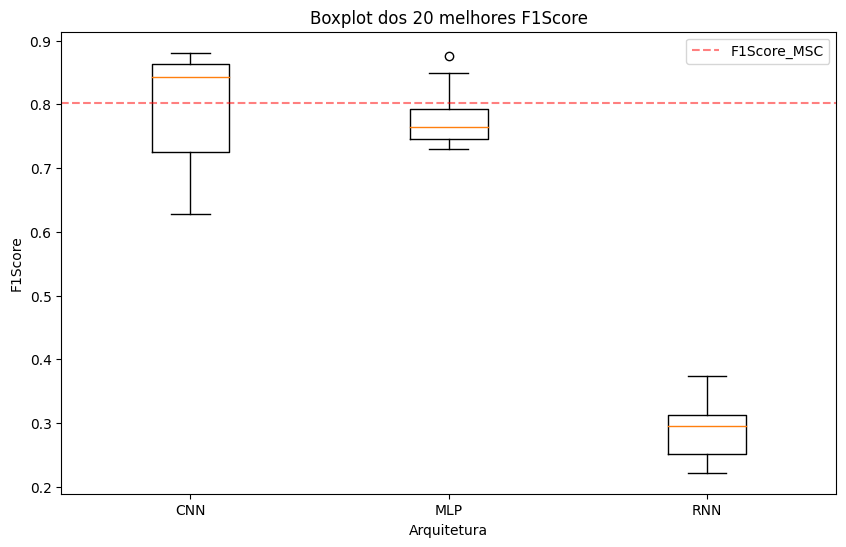

In [7]:
plt.figure(figsize=(10, 6))

# Box plot para os 20 melhores F1Score_RNA de cada DataFrame
plt.boxplot([dadosCNN['F1Score_RNA'].head(20),
             dadosMLP['F1Score_RNA'].head(20),
             dadosRNN['F1Score_RNA'].head(20)],
            labels=['CNN', 'MLP', 'RNN'])

# Linha pontilhada para o F1Score_MSC (substitua pelo valor desejado)
f1ScoreMsc = 0.801336  # Substitua pelo valor real do F1Score_MSC
plt.axhline(y=f1ScoreMsc, color='r', linestyle='--', label='F1Score_MSC', alpha = 0.5)

plt.title('Boxplot dos 20 melhores F1Score')
plt.ylabel('F1Score')
plt.xlabel('Arquitetura')
plt.legend()
plt.show()

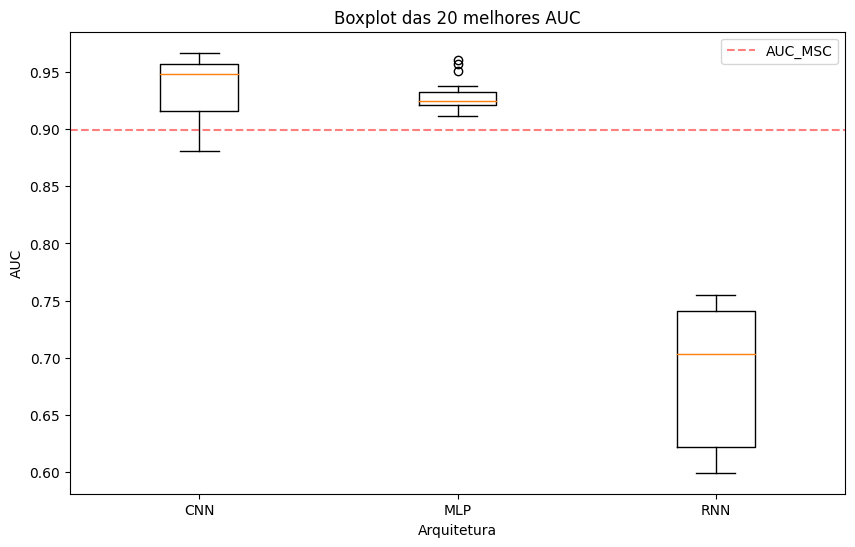

In [8]:
plt.figure(figsize=(10, 6))

# Box plot para os 20 melhores F1Score_RNA de cada DataFrame
plt.boxplot([dadosCNN['auc_RNA'].head(20),
             dadosMLP['auc_RNA'].head(20),
             dadosRNN['auc_RNA'].head(20)],
            labels=['CNN', 'MLP', 'RNN'])

# Linha pontilhada para o AUC_MSC (substitua pelo valor desejado)
aucMsc = 0.899341  # Substitua pelo valor real do AUC_MSC
plt.axhline(y=aucMsc, color='r', linestyle='--', label='AUC_MSC', alpha = 0.5)

plt.title('Boxplot das 20 melhores AUC')
plt.ylabel('AUC')
plt.xlabel('Arquitetura')
plt.legend()
plt.show()

# Reavaliação dos melhores modelos

In [9]:
def tratarDados(data, janelas = 500, testSize = 0.3):

    #transforma o itens do data frame em números complexos

    colunas = data.keys()
    def magica(x):
        try:
            return complex(x.replace("i","j"))
        except:
            return complex(x)
    preData = data[colunas[:janelas]].applymap(magica)
    data = pd.concat([preData, data[colunas[janelas:]]],axis=1)

    try:
        data = data.drop(columns=['voluntario','Intensidade_db', 'Faixa_Moduladora', 'Freq_analisada_Hz', 'Canal'], axis=1)
    except:
      pass

    #embaralha os daddos
    data = shuffle(data,random_state=26)

    dataTrain, testeData = train_test_split(data, test_size=testSize, random_state=26)

    yComp = data['classe']
    xComp = data.drop(columns=['classe'], axis=1)

    xComp = xComp.to_numpy()
    yComp = yComp.to_numpy()

    yTeste = testeData['classe']
    xTeste = testeData.drop(columns=['classe'], axis=1)

    yTrain = dataTrain['classe']
    xTrain = dataTrain.drop(columns=['classe'], axis=1)

    xTrain = xTrain.to_numpy()
    xTrain = abs(xTrain)
    yTrain = yTrain.to_numpy()

    xTeste = xTeste.to_numpy()
    xTeste = abs(xTeste)
    yTeste = yTeste.to_numpy()

    scaler = StandardScaler()

    xTrain = scaler.fit_transform(xTrain)
    xTeste = scaler.transform(xTeste)

    return xTrain, xTeste, yTrain, yTeste, xComp, yComp


In [10]:
def contruirModelo(learning_rate=0.001, n_hidden=5, n_neurons=200, kernel_size=3, pool_size=2,
                   optimizer='adam', input_shape=(500,), drop = 0.2, hidden_func = 'relu', modelo = "MLP", lstm = 50):
    keras.backend.clear_session()
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = Sequential()

    if modelo == "CNN":
      model.add(Conv1D(250, kernel_size=kernel_size, activation='relu', input_shape=(500,1)))
      model.add(Flatten())

    elif modelo == "MLP":
      model.add(Input(shape=(500,)))
    else:
      model.add(LSTM(lstm, input_shape=(500, 1)))

    for _ in range(n_hidden):
        model.add(Dense(n_neurons, activation = hidden_func))
        if modelo == "CNN":
          Dropout(drop)

    model.add(Dense(1, activation="sigmoid"))

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[AUC()])
    return model

In [11]:
def predModel(xTeste, yTeste):
    yPred= kerasClas.predict(xTeste)
    auc = roc_auc_score(yTeste,yPred)
    return roc_curve(yTeste, yPred), auc, yPred


In [12]:
def msc(x, y, M = 500, alfa=0.05):
    #cáculo da MSC
    MSC=(np.abs(np.sum(x,axis=1))**2)/(M*np.sum((np.abs(x)**2),axis=1))
    #valor crítico da MSC
    vcMSC = 1 - (alfa**(1/(M-1)))
    #previsões
    decMSC = MSC > vcMSC
    decMSC = np.multiply(decMSC,1)
    #Curva roc msc
    #plot_roc_curve(fprMSC, tprMSC, 'MSC')
    auc = roc_auc_score(y, MSC)
    #auc
    return roc_curve(y, MSC), auc, MSC

In [13]:
def plot_roc_curve(fpr, tpr, label=None):
    # Definir a figura com tamanho e DPI alto

    # Plotar a curva ROC
    plt.plot(fpr, tpr, linewidth=2, label=label)

    # Plotar a linha diagonal
    plt.plot([0, 1], [0, 1], 'k--')

    # Definir os limites dos eixos
    plt.axis([0, 1, 0, 1])

    # Adicionar rótulos e título com fontes maiores
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.title('Curva ROC', fontsize=20)

    # Adicionar uma grade e uma legenda com fontes maiores
    plt.grid(True)
    plt.legend(fontsize=14)

    # Ajustar o layout para evitar sobreposição
    #plt.tight_layout()

    # Mostrar o gráfico

In [14]:
def plotAll(fprRNA, tprRNA, fprMSC, tprMSC, label='RNA'):

    plot_roc_curve(fprRNA, tprRNA, label=label)
    plot_roc_curve(fprMSC, tprMSC, 'MSC')
    plt.axvline(x=0.05, color='gray', linestyle='--')

In [15]:

paransCNN = dadosCNN.iloc[:1, 8:]
paransMLP = dadosMLP.iloc[:1, 8:]
paransRNN = dadosRNN.iloc[:1, 8:]
paransMLP["kernel_size"] = 0
paransMLP['drop'] = 0
paransMLP['lstm'] = 0
paransRNN["kernel_size"] = 0
paransRNN['drop'] = 0
paransCNN['lstm'] = 0

paransCNN = paransCNN.to_dict('records')[0]
paransMLP = paransMLP.to_dict('records')[0]
paransRNN = paransRNN.to_dict('records')[0]
paransCNN

{'n_hidden': 17,
 'n_neurons': 460,
 'learning_rate': 0.0025206090907511,
 'optimizer': 'sgd',
 'hidden_func': 'relu',
 'kernel_size': 6,
 'drop': 0.6675881347560395,
 'lstm': 0}

In [16]:
parans = {"CNN": paransCNN, "MLP": paransMLP, "RNN": paransRNN}
parans

{'CNN': {'n_hidden': 17,
  'n_neurons': 460,
  'learning_rate': 0.0025206090907511,
  'optimizer': 'sgd',
  'hidden_func': 'relu',
  'kernel_size': 6,
  'drop': 0.6675881347560395,
  'lstm': 0},
 'MLP': {'n_hidden': 1,
  'n_neurons': 207,
  'learning_rate': 9.16049417193084e-05,
  'optimizer': 'adam',
  'hidden_func': 'relu',
  'kernel_size': 0,
  'drop': 0,
  'lstm': 0},
 'RNN': {'n_hidden': 10,
  'n_neurons': 490,
  'learning_rate': 8.902418441786163e-05,
  'optimizer': 'adam',
  'hidden_func': 'relu',
  'lstm': 494,
  'kernel_size': 0,
  'drop': 0}}

In [17]:
modelos = ["CNN", "MLP", "RNN"]
xTrain, xTeste, yTrain, yTeste, xComp, yComp = tratarDados(data)


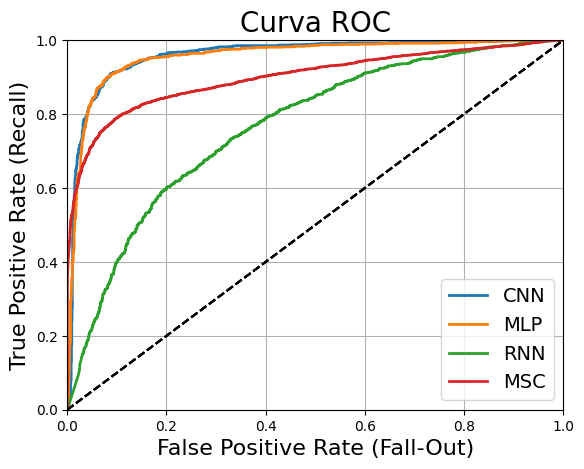

In [18]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
callbacks = [early_stopping_cb]

[fprMSC, tprMSC, thresholds], aucmsc, Y = msc(xComp, yComp)

for modelo in modelos:

  if modelo == "RNN":
    xTrain = xTrain.reshape(xTrain.shape[0], 500, 1)
    xTeste = xTeste.reshape(xTeste.shape[0], 500, 1)
  
  kerasClas = contruirModelo(n_hidden=parans[modelo]['n_hidden'], n_neurons=parans[modelo]['n_neurons'], learning_rate=parans[modelo]['learning_rate'],
                              optimizer=parans[modelo]['optimizer'], hidden_func = parans[modelo]['hidden_func'],
                              kernel_size = parans[modelo]["kernel_size"], drop = parans[modelo]["drop"], modelo = modelo, lstm = parans[modelo]["lstm"])
  print(kerasClas.summary())
  kerasClas.fit(xTrain, yTrain, epochs=150, callbacks=callbacks)

  [fprRNA, tprRNA, thresholds], aucrna, Y = predModel(xTeste, yTeste)

  plot_roc_curve(fprRNA, tprRNA, label=modelo)

  clear_output(wait=True)

plot_roc_curve(fprMSC, tprMSC, 'MSC')
plt.show()

In [19]:
kerasClas.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 494)               980096    
                                                                 
 dense (Dense)               (None, 490)               242550    
                                                                 
 dense_1 (Dense)             (None, 490)               240590    
                                                                 
 dense_2 (Dense)             (None, 490)               240590    
                                                                 
 dense_3 (Dense)             (None, 490)               240590    
                                                                 
 dense_4 (Dense)             (None, 490)               240590    
                                                                 
 dense_5 (Dense)             (None, 490)               2